In [1]:
## Synthetic Portfolios

In [2]:
from IPython.display import Image

In [3]:
import matplotlib.pyplot as plt

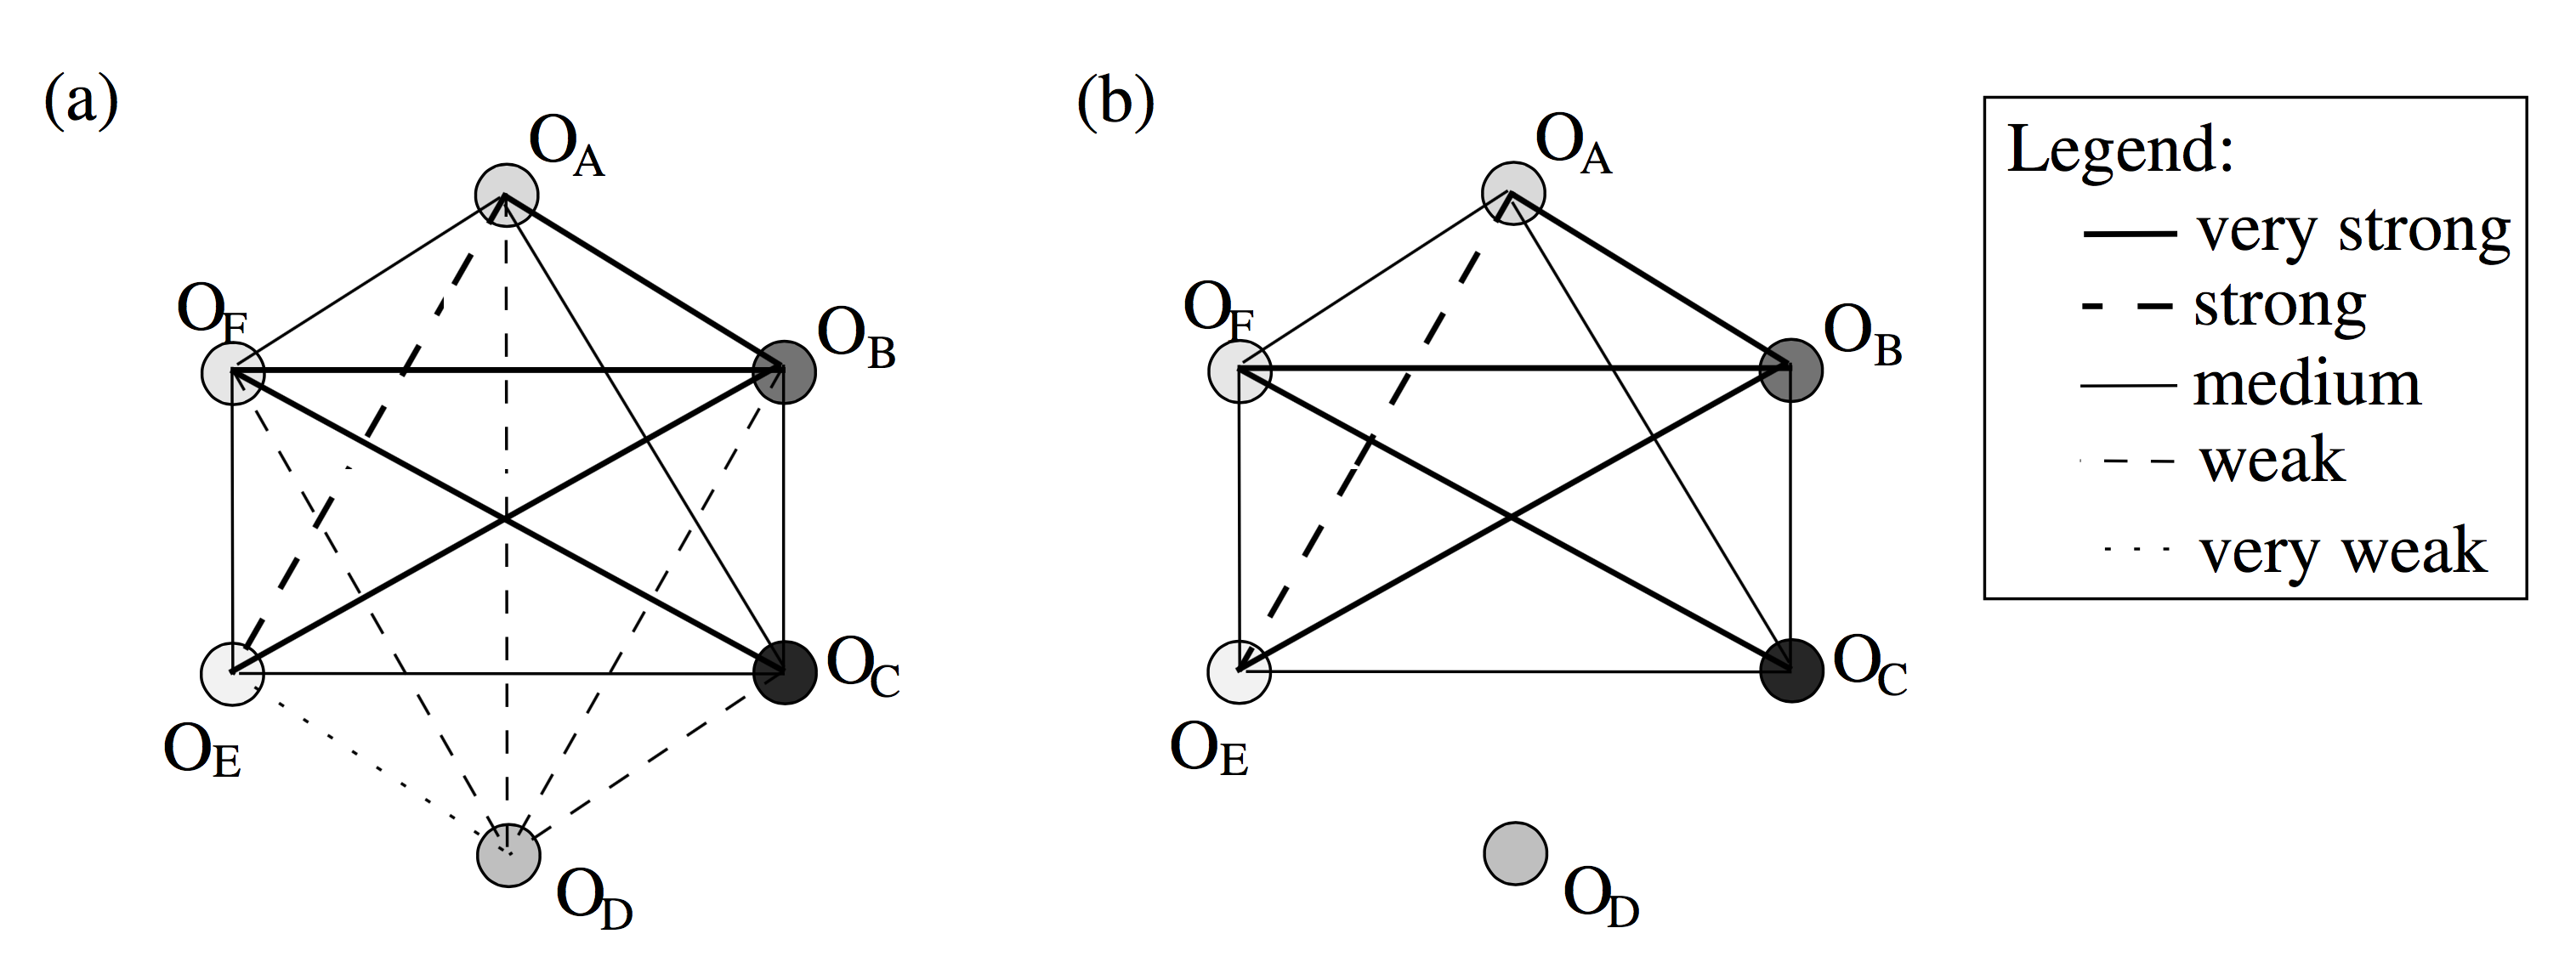

In [4]:
Image(filename='Stylized portfolios.png', retina=True)

In [5]:
very_strong = 0.8
strong = 0.6
medium = 0.4
weak = 0.2
very_weak = 0.05

In [26]:
import numpy as np

a = np.array([[0, very_strong, medium, weak, strong, medium],
[very_strong, 0, medium, weak, very_strong, very_strong],
[medium, medium, 0, weak, medium, very_strong],
[weak, weak, weak, 0, very_weak, weak],
[strong, very_strong, medium, very_weak, 0, medium],
[medium, very_strong, very_strong, weak, medium, 0]])



b = np.array([[0, very_strong, medium, 0, strong, medium],
[very_strong, 0, medium, 0, very_strong, very_strong],
[medium, medium, 0, 0, medium, very_strong],
[     0,      0, 0,    0,      0, 0],
[strong, very_strong, medium, 0, 0, medium],
[medium, very_strong, very_strong, 0, medium, 0]])

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
g = nx.from_numpy_matrix(a)
gb = nx.from_numpy_matrix(b)

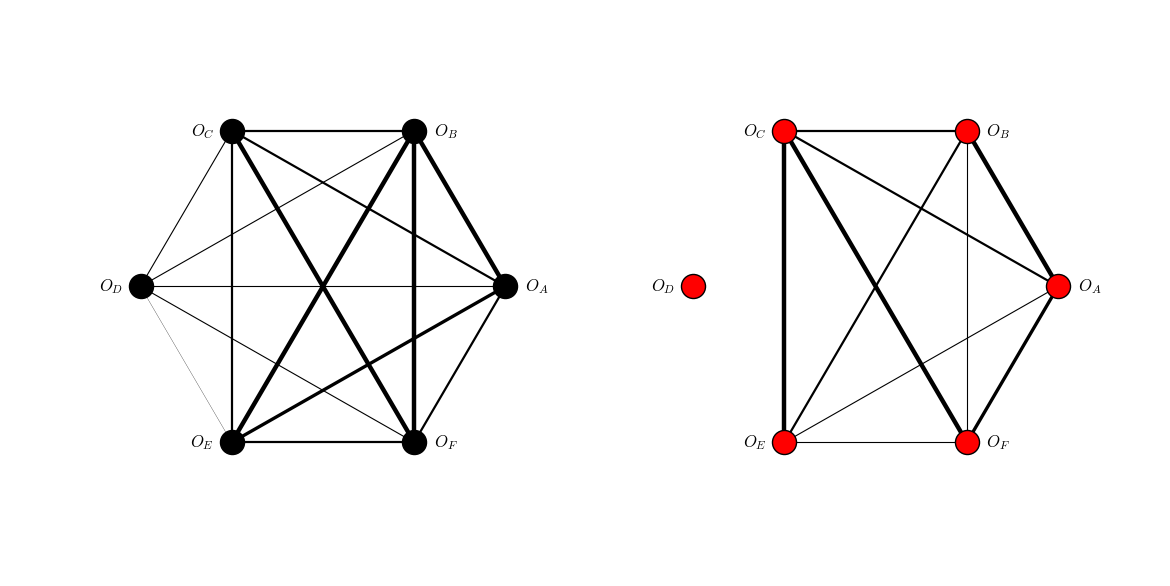

In [123]:
%matplotlib inline

plt.figure(figsize=(11,6))
plt.subplots_adjust(left=0,right=1,bottom=0,wspace=0.01,hspace=0.01)

plt.subplot(121)
plt.axis('off')

l = "            "
labels = dict(((i, l+("$O_%s$" % x)) if x in ['B', 'A', 'F'] else (i, ("$O_%s$" % x)+l)) for i,x in enumerate('A,B,C,D,E,F'.split(',')))
nx.draw_circular(g,
                 node_color='k',
                 width=[4 * e[2]['weight'] for e in g.edges(data=True)],
                 labels=labels,
                )

plt.subplot(122)
plt.axis('off')


nx.draw_circular(gb,
                 edge_cmap=plt.cm.Blues,
                 labels=labels,
                 width=[4 * e[2]['weight'] for e in g.edges(data=True)])


plt.savefig("../figures/ramping_parameter_example.png", bbox_inches="tight")

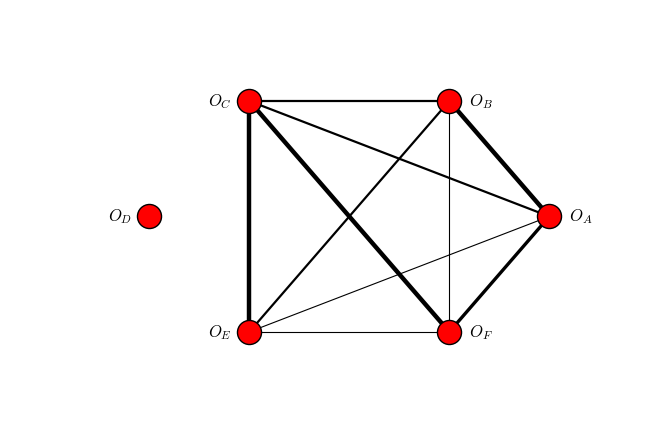

In [118]:
# plt.subplot(122)
# plt.axis('off')
# plt.subplots_adjust(left=0,right=1,bottom=0,wspace=0.01,hspace=0.01)


pos=nx.circular_layout(gb)
# plt.title("b")
nx.draw_circular(gb,
                 edge_cmap=plt.cm.Blues,
                 labels=labels,
                 width=[4 * e[2]['weight'] for e in g.edges(data=True)])


plt.savefig("lala.png", bbox_inches="tight")

In [94]:
!open .

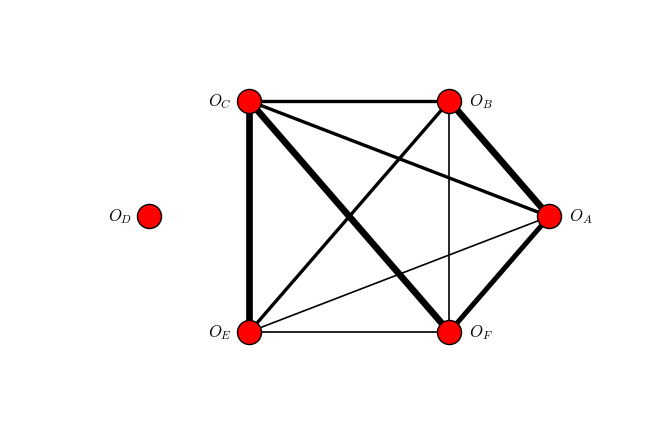

In [61]:
%matplotlib inline
l = "            "
labels = dict(((i, l+("$O_%s$" % x)) if x in ['B', 'A', 'F'] else (i, ("$O_%s$" % x)+l)) for i,x in enumerate('A,B,C,D,E,F'.split(',')))
nx.draw_circular(gb,
                 edge_cmap=plt.cm.Blues,
                 labels=labels,
                 width=[6 * e[2]['weight'] for e in g.edges(data=True)])

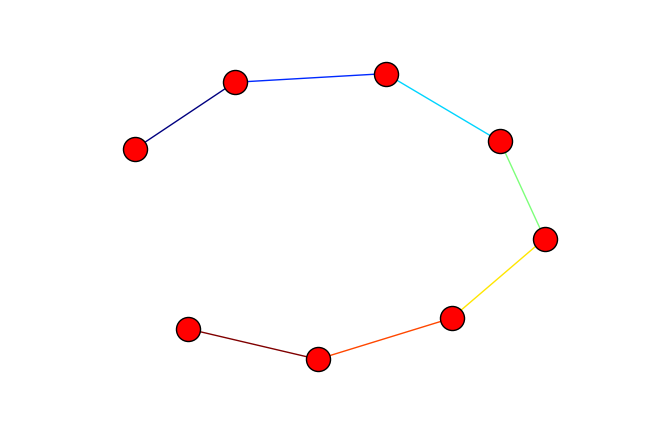

In [18]:
%matplotlib inline
try:
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    import matplotlib.cm as cmx
    import numpy as np
except:
    raise 

import networkx as nx

G=nx.path_graph(8)
#Number of edges is 7
values = range(7)
# These values could be seen as dummy edge weights

jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorList = []

for i in range(7):
  colorVal = scalarMap.to_rgba(values[i])
  colorList.append(colorVal)


nx.draw(G,edge_color=colorList)


In [10]:
G = nx.Graph()
G.add_nodes_from(g)
G.nodes()
# G.add_nodes_from?

[0, 1, 2, 3, 4, 5]

In [11]:
def ramping_parameter(g, v):
    G = nx.Graph()
    G.add_nodes_from(g.nodes(data=True))
    G = nx.Graph([e for e in g.edges_iter(data=True) if e[2]['weight'] > v])
    return nx.number_connected_components(G), G

In [12]:
[x for x in g.edges_iter(data=True) if x[2]['weight'] > 0.2]

[(0, 1, {'weight': 0.8}),
 (0, 2, {'weight': 0.4}),
 (0, 4, {'weight': 0.6}),
 (0, 5, {'weight': 0.4}),
 (1, 2, {'weight': 0.4}),
 (1, 4, {'weight': 0.8}),
 (1, 5, {'weight': 0.8}),
 (2, 4, {'weight': 0.4}),
 (2, 5, {'weight': 0.8}),
 (4, 5, {'weight': 0.4})]

In [13]:
nx.connected_components?

In [14]:
def ramping(g, value):
    GG = g.copy()
    for e in g.edges_iter(data=True):
        if e[2]['weight'] <= value:
            GG.remove_edge(*e[:2])
    return nx.number_connected_components(GG) * 1.0 / GG.number_of_nodes() , GG

In [15]:
def ramp_up(g):
    x = np.arange(0.0, 1., 0.01)
    y = np.zeros_like(x)
    for i, p in enumerate(x):
        c = ramping(g, p)
        y[i] = c[0]
    return x, y

In [16]:
GG.nodes()
nx.number_connected_components(GG)

NameError: name 'GG' is not defined

In [ ]:
# ramping_parameter(nx.generate_pajek)

In [ ]:
np.random.rand()

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib notebook
sns.distplot(1-np.random.power(3, size=100))

In [ ]:
def generate_graph(n, weight_dist='pow'):
    """ generates watts strotgatz with uniform weights """
    g100 = nx.generators.watts_strogatz_graph(n, int(0.05 * n), 0.9)
    if weight_dist == 'pow':
        f_weight = lambda: 1-np.random.power(2.1)
    else:
        f_weight = np.random.rand
    for s, t in g100.edges_iter():
        g100[s][t]['weight'] = f_weight()
    return g100

In [ ]:
%matplotlib notebook
g1 = generate_graph(100)
x, y = ramp_up(g1)


plt.plot(x,y)

In [ ]:
%matplotlib notebook
nx.draw_networkx(g, pos=nx.layout.circular_layout(g))

In [ ]:
nx.draw_networkx?

In [ ]:
O = [0.01, 0.24, 0.25, .24, .24, .01, .01]

In [ ]:
def ramping(g, value):
    GG = g.copy()
    for e in g.edges_iter(data=True):
        if e[2]['weight'] <= value:
            GG.remove_edge(*e[:2])
    return nx.connected_components(GG) # * 1.0 / GG.number_of_nodes() , GG

In [ ]:
def cluster_risk(g, O, ramping_value):
    weights = []
    for x in ramping(g, ramping_value):
        weights.append( np.sum([O[n] for n in x]) )
    return weights[np.argmax(weights)] / np.sum(weights)

In [ ]:
for i in np.arange(0., 1., 100):
    print(i)

In [ ]:
m = np.zeros((7,7))
m[0,1] = .3
m[6,3] = .6
m[5,4] = .35
g = nx.from_numpy_matrix(m)

In [ ]:
%matplotlib notebook
ramp1 = pd.Series(dict((v, cluster_risk(g, O, v)) for v in np.linspace(0., 1., 100)))
ramp1.plot(ylim=[0,1])

In [ ]:
m1 = np.zeros((7,7))
m1[1,2] = 0.4
m1[2,3] = 0.42
m1[3,4] = .51
m1[2,4] = .3
g1 = nx.from_numpy_matrix(m1)

In [ ]:
import pandas as pd

In [ ]:
%matplotlib notebook
ramp1 = pd.Series(dict((v, cluster_risk(g1, O, v)) for v in np.linspace(0., 1., 100)))
ramp1.plot(ylim=[0,1])